## Import packages.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ipyvolume as ipv
%matplotlib inline

## Get and sort the data.

In [2]:
data = pd.read_csv('hitsOutput.csv', names=('e', 'x', 'y', 'z', 'te', 'mx', 'my', 'mz', 'id'))
cals = data[data.z.abs() < 17.5]
plates = data[data.z.abs() >= 17.5]

# Split cals data into z bins.
numBins = 7
binSize = 35 / numBins
split = [cals[
            (17.5 - i * binSize >= cals.z) 
            & (cals.z > 17.5 - (i + 1) * binSize)
        ] for i in range(numBins)]

## Play around with the data.

### Histograms
2d histograms showing hits in 7 bins along the tubes in the z-direction.

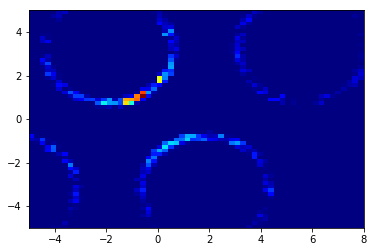

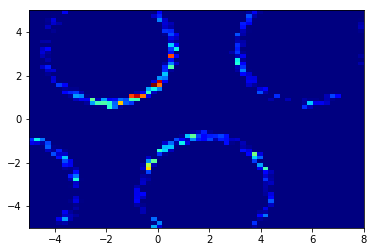

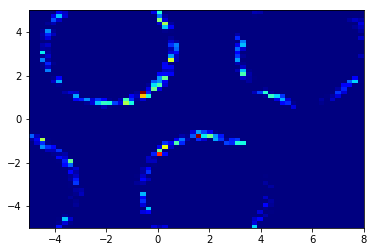

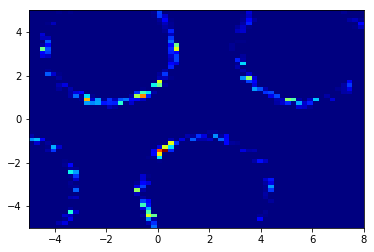

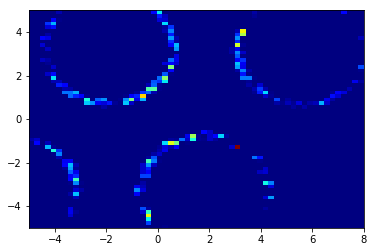

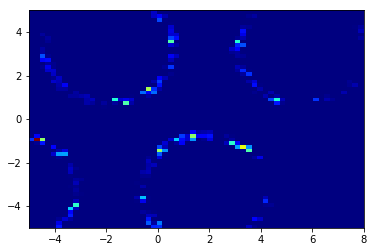

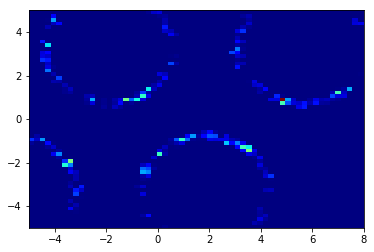

In [3]:
for i in range(numBins):
    fig = plt.figure()
    plt.hist2d(split[i].x, split[i].y, bins=60, 
               range=((-5, 8), (-5, 5)), cmap=plt.cm.jet)

### Quiver
2d and 3d "quiver" (vector) plots showing momentum of the hits in 7 bins along the tubes in the z-direction.

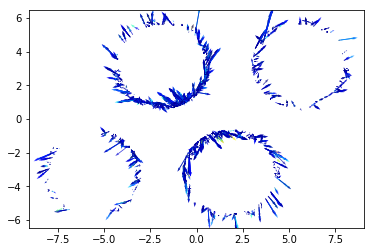

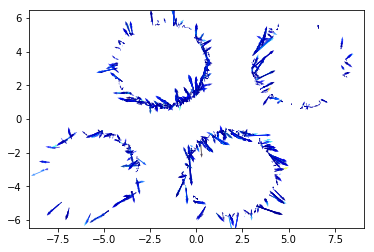

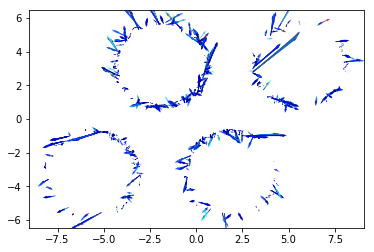

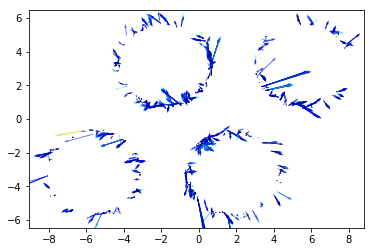

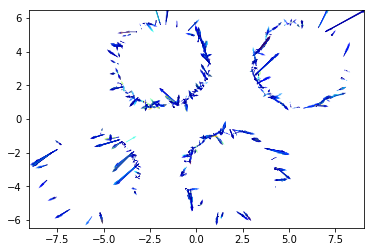

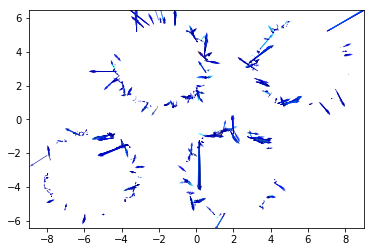

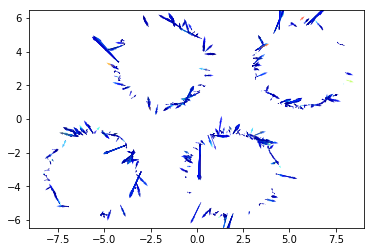

In [4]:
for i in range(numBins):
    fig = plt.figure()
    # plt.xlim(-6, 9)
    # plt.ylim(-6, 6)
    plt.quiver(split[i].x, split[i].y, 
               split[i].mx, split[i].my, split[i].e,
               cmap=plt.cm.jet, alpha=0.7)

In [5]:
for i in range(numBins):
    # plt.xlim(-6, 9)
    # plt.ylim(-6, 6)
    fig = ipv.figure()
    ipv.quiver(split[i].x.values, split[i].y.values, split[i].z.values,
               split[i].mx.values, split[i].my.values, split[i].mz.values, 
               size=5)
    ipv.show()

### Spread
2D standard deviation of the positions.

In [6]:
def spread(data):
    return np.sqrt((
            (data.x**2 + data.y**2 + data.z**2).mean()
            - data.x.mean()**2 - data.y.mean()**2 - data.z.mean()**2
        ) / len(data.x))

for i in range(numBins):
    print(i, spread(split[i]))

0 0.0417819681930635
1 0.045997127747926116
2 0.057501852108640485
3 0.06422286534705411
4 0.06019895469243086
5 0.07087173249161367
6 0.07186688852795957
